In [474]:
import requests

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

In [475]:
url = "https://www.fotmob.com/id/matches/barcelona-vs-bayern-munchen/2tf6hw#4621509"
match_id = url.split("#")[-1]

In [476]:
params = {
    'matchId': match_id,
}

response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)

In [477]:
data = response.json()

In [478]:
shotmap = data['content']['shotmap']['shots']

In [479]:
df = pd.DataFrame(shotmap)

In [480]:
print(df.head())

           id     eventType  teamId  playerId    playerName          x  \
0  2737992879          Goal    8634    696679      Raphinha  98.631579   
1  2737998305  AttemptSaved    9823    194165    Harry Kane  86.245588   
2  2738004195          Miss    9823    194165    Harry Kane  92.700000   
3  2738004889  AttemptSaved    9823    385437  Serge Gnabry  92.800000   
4  2738005773          Goal    9823    194165    Harry Kane  98.824561   

           y  min  minAdded  isBlocked  ...    situation     period  \
0  41.057857    1       NaN      False  ...  RegularPlay  FirstHalf   
1  33.008750    8       NaN      False  ...  RegularPlay  FirstHalf   
2  41.599063   16       NaN      False  ...  RegularPlay  FirstHalf   
3  50.376561   17       NaN      False  ...  RegularPlay  FirstHalf   
4  30.950000   18       NaN      False  ...  RegularPlay  FirstHalf   

   isOwnGoal                                         onGoalShot  \
0      False  {'x': 0.9798280423280419, 'y': 0.1189083814814.

In [481]:
df.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [482]:
df["x"] = df["x"] * 1.15
df["y"] = df["y"] * 1.05

mplsoccer supports 10 pitch types by specifying the pitch_type argument: ‘statsbomb’, ‘opta’, ‘tracab’, ‘wyscout’, ‘uefa’, ‘metricasports’, ‘custom’, ‘skillcorner’, ‘secondspectrum’ and ‘impect’.

If you are using tracking data or the custom pitch (‘metricasports’, ‘tracab’, ‘skillcorner’, ‘secondspectrum’ or ‘custom’), you also need to specify the pitch_length and pitch_width, which are typically 105 and 68 respectively.

In [483]:
# df.to_csv('fa_cup_final_2024.csv')

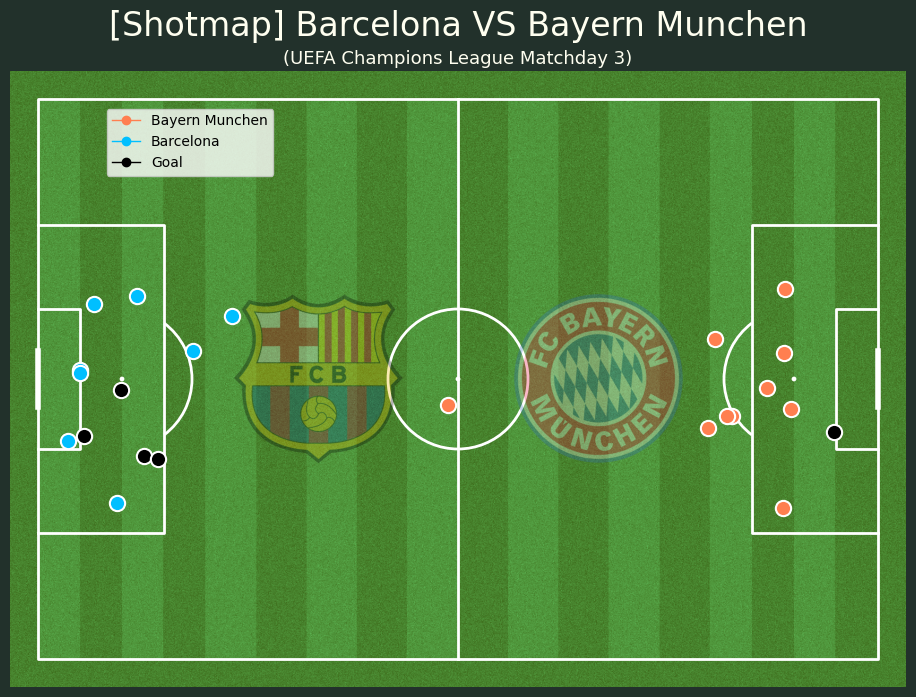

In [484]:
fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True,
    half=False,
)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()
plt.text(
    60,  # Koordinat x 
    89,  # Koordinat y 
    "[Shotmap] Barcelona VS Bayern Munchen",
    color="ivory",
    fontsize=24,
    ha="center",  
)
plt.text(
    60,  # Koordinat x
    85,  # Koordinat y
    "(UEFA Champions League Matchday 3)",
    color="ivory",
    fontsize=13,
    ha="center",  # Center alignment
)

# logo
barcelona_logo = mpimg.imread("barcaLogo.png")
bayern_logo = mpimg.imread("bayernLogo.png") 

logo_size = 25 

# Logo Barcelona
ax.imshow(
    barcelona_logo,
    extent=[
        40 -logo_size / 2,
        40 + logo_size / 2,
        40 - logo_size / 2,
        40 + logo_size / 2
    ],
    aspect="equal",
    zorder=3,
    alpha=0.3,
)

# Logo Bayern
ax.imshow(
    bayern_logo,
    extent=[
        80 - logo_size / 2,
        80 + logo_size / 2,
        40 - logo_size / 2,
        40 + logo_size / 2,
    ],
    aspect="equal",
    zorder=3,
    alpha=0.3,
)


# Plot
for x in range(len(df["x"])):
    color = (
        "k"
        if df["eventType"][x] == "Goal"
        else ("coral" if df["teamColor"][x] == "#C60428" else "deepskyblue")
    )
    marker_size = 11
    if df["teamColor"][x] == "#C60428":
        plt.plot(
            df["x"][x],
            df["y"][x],
            color=color,
            label="Bayern Munchen" if x == 0 else "", 
            marker="o",
            markersize=marker_size,
            markeredgewidth=1.5,
            markeredgecolor="white",
        )
        plt.scatter(
            df["x"][x], df["y"][x], color=color, edgecolors="white", s=marker_size * 1.5
        )
    elif df["teamColor"][x] == "#971e48":
        df["x"][x] = 120 - df["x"][x]
        df["y"][x] = 75 - df["y"][x]
        plt.plot(
            df["x"][x],
            df["y"][x],
            color=color,
            label="Barcelona" if x == 0 else "",  
            marker="o",
            markersize=marker_size,
            markeredgewidth=1.5,
            markeredgecolor="white",
        )
        plt.scatter(
            df["x"][x], df["y"][x], color=color, edgecolors="white", s=marker_size * 1.5
        )

# legend
legend_elements = [
    Line2D([0], [0], marker="o", color="coral", lw=1, label="Bayern Munchen"),
    Line2D([0], [0], marker="o", color="deepskyblue", lw=1, label="Barcelona"),
    Line2D([0], [0], marker="o", color="black", lw=1, label="Goal"),
]

plt.legend(handles=legend_elements, bbox_to_anchor=(0.1, 0.95))
plt.show()